# Лабораторная работа № 1
## Персептроны. Процедура обучения Розенблатта

#### Выполнил: Цапков А.М.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
# Реализация Персептрона 
class RosenblatPerceptron(object):
    def __init__(self,  learningRate = 0.01):
        self.learningRate = learningRate
    
    def fit(self, X, Y):
        self._w = np.random.rand(Y.shape[1] ,X.shape[1] + 1)
        
        for _ in range(100):
            for x, y in zip(X, Y):
                pred = self.predict_one(x)
                for pred_one, y_one, neuron_waights in zip(pred, y, self._w):
                    dw = (y_one - pred_one) * self.learningRate
                    neuron_waights += np.append(x, [1]) * dw
    def predict_one(self, x):
        inp = np.append(x, [1])
        return np.where(np.dot(self._w, inp) > 0, 1, 0)

    def predict(self, X):
        ans = []
        for x in X:
            ans.append(self.predict_one(x))
        return np.array(ans)
    
    def y(self, x, neuron = 0):
        return (-x*self._w[neuron][0] - self._w[neuron][2]) / self._w[neuron][1]

    def score(self, X, Y):
        Y_pred = self.predict(X)
        k, i = 0, 0
        for y, y_pred in zip(Y, Y_pred):
            for r, r1 in zip(y, y_pred):
                if r != r1:
                    i += 1
                    break
            k += 1
        return float(k - i) / k


In [3]:
# Вспомогательные функции
def devide(X, Y):
    s = {}
    for x, y in zip(X, Y):
        if tuple(y) not in s:
            s[tuple(y)] = []
        s[tuple(y)].append(x)
    ans = []
    for key, val in s.items():
        ans.append(val)
    return ans

def pltClasses(X, Y):
    c = {1:'red', 2:'blue', 3:'green', 4:'orange'}
    k = 0
    for set in devide(X, Y):
        set = np.array(set)
        k += 1
        plt.scatter(set[:, 0], set[:, 1],
                color=c[k], marker='o')

def pltDevider(model, dim):
    x1 = -1
    x2 = 1
    y1 = model.y(x1, dim)
    y2 = model.y(x2, dim)
    plt.axline((x1, y1), (x2, y2))

1.0
[[1]
 [1]
 [0]
 [0]
 [0]
 [0]]


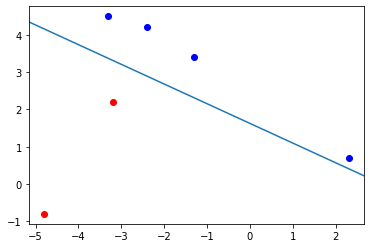

In [4]:
model = RosenblatPerceptron()
X = np.array([[-4.8, -0.8],[-3.2, 2.2],[-1.3, 3.4],[2.3, 0.7],[-3.3, 4.5],[-2.4, 4.2]])
Y = np.array([[1],[1],[0],[0],[0],[0]])

model.fit(X, Y)
print(model.score(X, Y))
print(model.predict(X))
pltClasses(X, Y)
pltDevider(model, 0)

plt.show()

1.0
[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]]


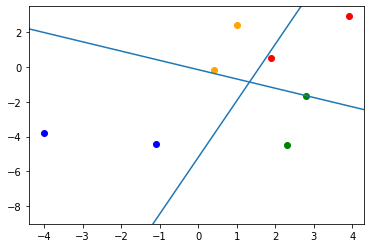

In [5]:
X = np.array([[1.9, 0.5], 
            [-1.1, -4.4], 
            [2.8, -1.7],  
            [1, 2.4], 
            [-4, -3.8], 
            [0.4, -0.2], 
            [3.9, 2.9], 
            [2.3, -4.5]])

Y = np.array([[0, 1],
              [1, 0],
              [0, 0],
              [1, 1],
              [1, 0],
              [1, 1],
              [0, 1],
              [0, 0]])

model.fit(X, Y)
print(model.score(X, Y))
print(model.predict(X))
pltClasses(X, Y)
pltDevider(model, 0)
pltDevider(model, 1)
plt.show()

0.5
[[1]
 [1]
 [0]
 [0]]


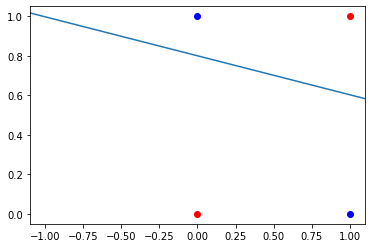

In [6]:
model = RosenblatPerceptron()
X = np.array([[0, 0],[1, 0],[0, 1],[1, 1]])
Y = np.array([[0],[1],[1],[0]])

model.fit(X, Y)
print(model.score(X, Y))
print(model.predict(X))
pltClasses(X, Y)
pltDevider(model, 0)
plt.show()

0.25
[[1]
 [1]
 [0]
 [1]]


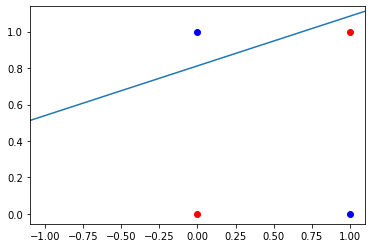

In [7]:
model = RosenblatPerceptron()
X = np.array([[0, 0],[1, 0],[0, 1],[1, 1]])
Y = np.array([[0],[1],[1],[0]])

model.fit(X, Y)
print(model.score(X, Y))
print(model.predict(X))
pltClasses(X, Y)
pltDevider(model, 0)
plt.show()


0.7
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]


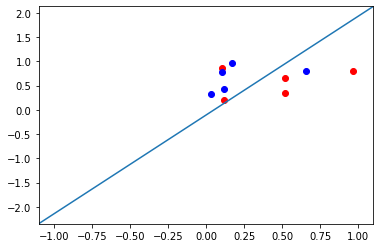

In [8]:
def randf():
    return float(randint(0, 1000)) / 1000

X = []
Y = []
for i in range(10):
    X.append([randf(), randf()])
    Y.append([randint(0,1)])

X = np.array(X)
Y = np.array(Y)
model.fit(X, Y)
print(model.score(X, Y))
print(model.predict(X))
pltClasses(X, Y)
pltDevider(model, 0)
plt.show()

# Выводы
Персептрон Розенблата -- архитектура ныне бесполезная, но легендарная. Это самое начало того мира нейросетей, в котором мы сейчас живем. Было интересно прознакомиться с истоками тех сетей, которые я вижу постоянно. 